<a href="https://colab.research.google.com/github/adhang/learn-tensorflow/blob/main/CNN_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CNN - MNIST Fashion

Author: Adhang Muntaha Muhammad

[![LinkedIn](https://img.shields.io/badge/linkedin-0077B5?style=for-the-badge&logo=linkedin&logoColor=white&link=https://www.linkedin.com/in/adhangmuntaha/)](https://www.linkedin.com/in/adhangmuntaha/)
[![GitHub](https://img.shields.io/badge/github-121011?style=for-the-badge&logo=github&logoColor=white&link=https://github.com/adhang)](https://github.com/adhang)
[![Kaggle](https://img.shields.io/badge/kaggle-20BEFF?style=for-the-badge&logo=kaggle&logoColor=white&link=https://www.kaggle.com/adhang)](https://www.kaggle.com/adhang)
[![Tableau](https://img.shields.io/badge/tableau-E97627?style=for-the-badge&logo=tableau&logoColor=white&link=https://public.tableau.com/app/profile/adhang)](https://public.tableau.com/app/profile/adhang)
___

# Libraires

In [68]:
import numpy as np 

# data viz
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})

import tensorflow as tf
from tensorflow import keras

from sklearn.model_selection import train_test_split

# Dataset

## Load Dataset

In [69]:
mnist = tf.keras.datasets.fashion_mnist
(train_data, train_label), (test_data, test_label) = mnist.load_data()

In [70]:
print('training data shape:', train_data.shape)
print('testing data shape:', test_data.shape)

training data shape: (60000, 28, 28)
testing data shape: (10000, 28, 28)


## Normalize

The original image pixel has a range from 0 to 255. I will change it to 0-1.

In [71]:
train_data[0, :10]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

In [72]:
train_data = train_data/255
test_data = test_data/255

In [73]:
train_data[0, :10]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

## Image Viz

In [74]:
print(train_data[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.00392157 0.    

In [75]:
print(train_label[0])

9


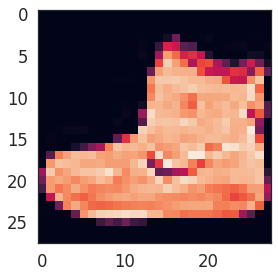

In [76]:
plt.imshow(train_data[0])

## Create Validation Set

In [77]:
X_train, X_val, y_train, y_val = train_test_split(train_data, train_label, 
                                                  train_size=0.7, stratify=train_label,
                                                  random_state=1)

# Model Development

## Create Model

In [78]:
model = tf.keras.models.Sequential([
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
                                    tf.keras.layers.MaxPooling2D(2,2),
                                    tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(512, activation='relu'),
                                    tf.keras.layers.Dense(256, activation='relu'),
                                    tf.keras.layers.Dense(10, activation='softmax')
])

In [79]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 13, 13, 16)       0         
 g2D)                                                            
                                                                 
 conv2d_13 (Conv2D)          (None, 11, 11, 16)        2320      
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 5, 5, 16)         0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 400)               0         
                                                                 
 dense_18 (Dense)            (None, 512)              

## Compile

In [80]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['accuracy'])

## Fit

In [81]:
history = model.fit(X_train, y_train, 
                    batch_size=64,
                    epochs=10,
                    validation_data=(X_val, y_val),
                    verbose=1)

Epoch 1/10
657/657 [==============================] - 23s 35ms/step - loss: 0.5701 - accuracy: 0.7887 - val_loss: 0.4721 - val_accuracy: 0.8254
Epoch 2/10
657/657 [==============================] - 22s 34ms/step - loss: 0.3759 - accuracy: 0.8606 - val_loss: 0.3379 - val_accuracy: 0.8734
Epoch 3/10
657/657 [==============================] - 22s 34ms/step - loss: 0.3223 - accuracy: 0.8791 - val_loss: 0.3071 - val_accuracy: 0.8865
Epoch 4/10
657/657 [==============================] - 22s 34ms/step - loss: 0.2915 - accuracy: 0.8909 - val_loss: 0.3090 - val_accuracy: 0.8877
Epoch 5/10
657/657 [==============================] - 23s 35ms/step - loss: 0.2652 - accuracy: 0.8994 - val_loss: 0.2810 - val_accuracy: 0.8950
Epoch 6/10
657/657 [==============================] - 22s 34ms/step - loss: 0.2433 - accuracy: 0.9079 - val_loss: 0.2924 - val_accuracy: 0.8923
Epoch 7/10
657/657 [==============================] - 24s 36ms/step - loss: 0.2232 - accuracy: 0.9167 - val_loss: 0.3026 - val_accuracy:

## Learning Curve

### Loss Viz

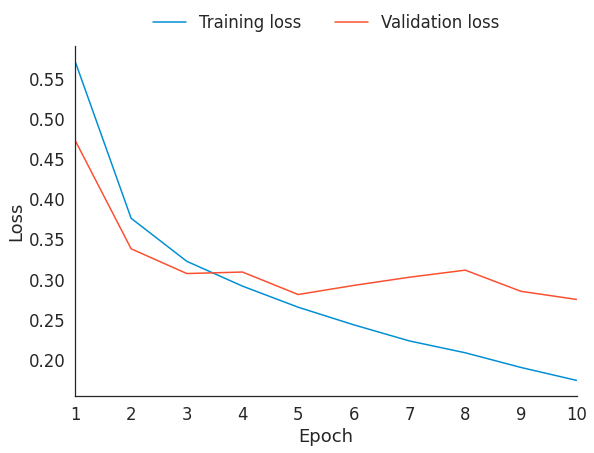

In [82]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['loss'])+1)

sns.lineplot(x=epochs, y=history.history['loss'], 
             label='Training loss', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_loss'], 
             label='Validation loss', ax=ax)

ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

### Accuracy Viz

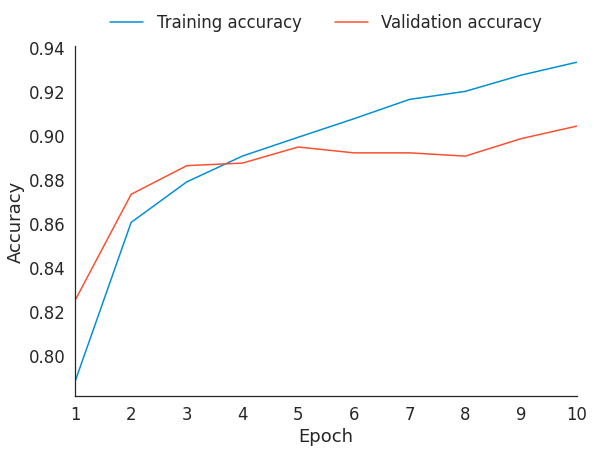

In [83]:
_, ax = plt.subplots(figsize=(8,6))

epochs = range(1,len(history.history['accuracy'])+1)

sns.lineplot(x=epochs, y=history.history['accuracy'], 
             label='Training accuracy', ax=ax)
sns.lineplot(x=epochs, y=history.history['val_accuracy'], 
             label='Validation accuracy', ax=ax)

ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_xlim(1, len(epochs))
ax.legend(loc='lower center', 
          bbox_to_anchor=(0.5, 1), 
          title='', ncol=2, frameon=False)

sns.despine()
plt.show()

## Evaluate

In [84]:
loss, acc = model.evaluate(test_data, test_label)
print(loss, acc)

313/313 [==============================] - 2s 6ms/step - loss: 0.2984 - accuracy: 0.8992
0.29842543601989746 0.8992000222206116


## Predict

In [85]:
prediction = model.predict(test_data[[0]])
print('test label:', test_label[0], '\n')
print('prediction (probability):\n', prediction, '\n')
print('rounded prediction:', prediction.round(2), '\n')
print('max probability:', np.argmax(prediction), '\n')

test label: 9 

prediction (probability):
 [[4.8509975e-08 5.5352604e-08 9.5650527e-09 1.6961722e-09 6.5329187e-10
  9.3947619e-06 3.0330855e-07 1.1880539e-04 2.1226207e-09 9.9987137e-01]] 

rounded prediction: [[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]] 

max probability: 9 



9


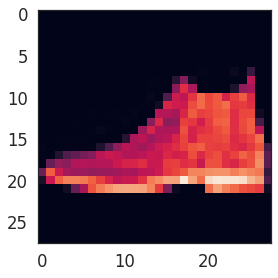

In [86]:
print(test_label[0])
plt.imshow(test_data[0])